# Non-Graded 1 : Logistic Regression
Using stroke dataset from [kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset), do cleaning and preprocessing to the data and use logistic regression to make a classification model with stroke prediction as the target.

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing, feature_selection, linear_model, model_selection, metrics, utils

## Data Loading

In [2]:
raw = pd.read_csv('stroke_data.csv')

### Simple data exploration
We use head(), info(), and describe to see a summary of the data

In [3]:
raw.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## Data Cleaning

### Drop column without any info

In [6]:
raw.drop(columns='id',inplace=True)
raw.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Rename columns

In [7]:
raw.rename(columns={'hypertension':'ht','heart_disease':'hd',
                    'ever_married':'mar','work_type':'wrk',
                    'Residence_type':'rsd','avg_glucose_level':'gluc',
                    'smoking_status':'smk','stroke':'target'}, inplace=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  5110 non-null   object 
 1   age     5110 non-null   float64
 2   ht      5110 non-null   int64  
 3   hd      5110 non-null   int64  
 4   mar     5110 non-null   object 
 5   wrk     5110 non-null   object 
 6   rsd     5110 non-null   object 
 7   gluc    5110 non-null   float64
 8   bmi     4909 non-null   float64
 9   smk     5110 non-null   object 
 10  target  5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Data Exploration

**Heatmap of variable correlation**

We can see that the target column have small correlation with the numerical columns, with only age column having correlation score above 0.2.

<AxesSubplot:>

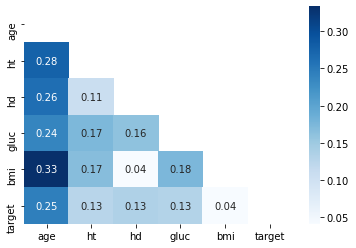

In [8]:
sn.heatmap(raw.corr(), annot=True, mask=np.triu(raw.corr()), fmt='.2f', cmap='Blues')

**Target class distribution**

Next we want to see if the target class for our classification is imbalanced or not.

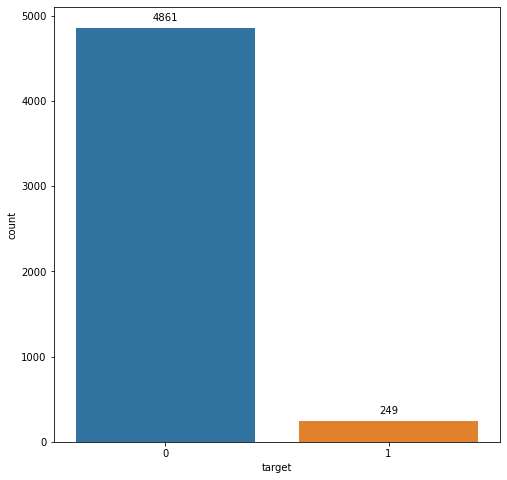

In [9]:
plt.figure(figsize=(8, 8))
splot = sn.countplot(data=raw, x='target')
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center', xytext = (0, 10),
        textcoords = 'offset points')

## Data Preprocessing

**Change binary category 'yes' and 'no' to 1 and 0**

In [10]:
raw.replace({'Yes':1,'No':0}, inplace=True)
raw.head()

,gender,age,ht,hd,mar,wrk,rsd,gluc,bmi,smk,target
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


**Encode categorical columns**

In [11]:
raw.gender.replace({'Male':0,'Female':1,'Other':3}, inplace=True)
raw.rsd.replace({'Rural':0,'Urban':1}, inplace=True)
raw.smk.replace({'Unknown':-1,'never smoked':0,'formerly smoked':1,'smokes':2}, inplace=True)
raw.wrk.replace({'Never_worked':0,'children':1,'Private':2,'Govt_job':3,'Self-employed':4}, inplace=True)

**Downsample majority target class**

In [12]:
minor = raw[raw.target==1].dropna()
major = raw[raw.target==0].dropna()

rmaj = utils.resample(
    major,
    replace=False,
    n_samples=209,
    random_state=52
)

resam = pd.concat([minor,rmaj], axis=0)

resam.target.value_counts()

1    209
0    209
Name: target, dtype: int64

**Split into train-test**

In [13]:
xt = resam.drop(columns='target')
yt = resam.target
xg = raw.drop(columns='target').fillna(raw.mean())
yg = raw.target
display(xt.shape, xg.shape)

(418, 10)

(5110, 10)

**Feature selection**

In [14]:
feat=['age','gluc','bmi']
pd.DataFrame(feature_selection.f_classif(xt[feat], yt)[0], index=feat, columns=['f score'])

,f score
age,240.802687
gluc,48.319717
bmi,15.344075


In [15]:
feat=['gender','ht','hd','mar','wrk','rsd','smk']
pd.DataFrame(feature_selection.mutual_info_classif(xt[feat], yt, random_state=52), index=feat, columns=['MI score'])

,MI score
gender,0.012805
ht,0.042021
hd,0.033354
mar,0.060336
wrk,0.071044
rsd,0.012819
smk,0.053365


drop columns with mi < 0.05 : gender, ht, hd, rsd

In [16]:
xt = xt.drop(columns=['gender','ht','hd','rsd'])
xg = xg.drop(columns=['gender','ht','hd','rsd'])

**Data scaling**

In [17]:
scale = preprocessing.StandardScaler()
xtt = scale.fit_transform(xt)
xgt = scale.transform(xg)

## Model Definition

In [18]:
mod = linear_model.LogisticRegression(C=1, solver='liblinear', max_iter=10000,random_state=52)

## Model Training

In [19]:
mod.fit(xtt,yt)

LogisticRegression(C=1, max_iter=10000, random_state=52, solver='liblinear')

## Model Evaluation
Use cross validation to check if the model overfits or not.

In [20]:
cv = model_selection.cross_validate(mod, xtt, yt, scoring=['accuracy','f1_macro','precision_macro','recall_macro'])
display(cv['test_accuracy'].mean(),
        cv['test_f1_macro'].mean(),
        cv['test_precision_macro'].mean(),
        cv['test_recall_macro'].mean()
       )

0.7845668387837063

0.784088898674989

0.7864537300507786

0.7843786295005808

In [21]:
metrics.confusion_matrix(yt, mod.predict(xtt))

array([[158,  51],
       [ 39, 170]], dtype=int64)

## Model Inference
Predict test data using the trained model.

In [22]:
metrics.confusion_matrix(yg, mod.predict(xgt))

array([[3397, 1464],
       [  45,  204]], dtype=int64)

In [23]:
print(metrics.classification_report(yg, mod.predict(xgt)))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      4861
           1       0.12      0.82      0.21       249

    accuracy                           0.70      5110
   macro avg       0.55      0.76      0.52      5110
weighted avg       0.94      0.70      0.79      5110



## Conclusion
We have done cleaning and preprocessing on the data:
 - drop unused column, rename columns
 - category encoding, feature selection, downsampling, drop nan for training, fill nan for testing.

The model's test score is decent, having 0.8 across the parameters, but the test score is worse - only at 0.7 and 0.5. As seen on the classification report, The imbalance of the target class is creating more false positive on class 1. This is despite the resampling done for training data. One workaround would be to increase the number of data for the minority label.